In [1]:
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt
import os
from pathlib import Path

Using TensorFlow backend.


In [2]:
p=Path("..//SVM//pokemon_images//")
print(p)
print(type(p))

..\SVM\pokemon_images
<class 'pathlib.WindowsPath'>


In [3]:
label=[]
labels=[]
label_dict={"Pikachu":0,"Bulbasaur":1,"Charmander":2}
img_data=[]

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('train.csv')

In [6]:
print(df.head())

   ImageId NameOfPokemon
0  296.jpg       Pikachu
1  297.jpg       Pikachu
2  298.jpg       Pikachu
3  299.jpg       Pikachu
4  300.jpg       Pikachu


In [7]:
df=df.values
print(df.shape)

(304, 2)


In [8]:
Y=df[:,-1] # labels

In [9]:
# lets Prepare the labels:
for i in range(Y.shape[0]):
    Y[i]=label_dict[Y[i]]

In [10]:
print(Y.shape)

(304,)


In [11]:
dirs=p.glob("*")

In [12]:
count=0
for img_path in dirs:
       # print(type(img_path))
        img=image.load_img(img_path,target_size=(100,100))
        img_array=image.img_to_array(img)
        img_data.append(img_array)
        count+=1

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [13]:
img_data=np.array(img_data)
print(img_data.shape)

(304, 100, 100, 3)


In [14]:
print(count)

304


In [15]:
label_dictionary={0:"Pikachu",1:"Bulbasaur",2:"Charmander"}
def drawImg(img,label):
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_dictionary[label])
    plt.show()

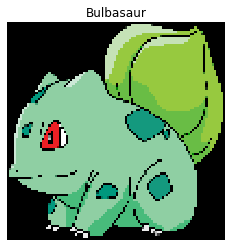

In [16]:
#drawImg(img_data[0]/255.0,Y[0])
drawImg(img_data[200]/255.0,Y[200]) # dekh akal k dushman, gdhe insan , bewkoof at te peak, dekh ye bulbasaur h dekha?? ye wse tu hi h XD?

# SVM Classifier

In [17]:
class SVM:
    def __init__(self,c=1.0):
        self.c=c
        self.w=0
        self.b=0
    def hinge_loss(self,w,b,X,Y):
        loss=0.0
        loss+=0.5*(np.dot(w,w.T))
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T)+b)
            loss+=(self.c*max(0,(1-ti)))
        return loss[0][0]
    def fit(self,X,Y,learning_rate=0.001,batch_size=100,max_itr=500):
        n_features=X.shape[1]
        samples=X.shape[0]
        n=learning_rate
        c=self.c
        losses=[]
        w=np.zeros((1,n_features))
        b=0
        for i in range(max_itr):
            l=self.hinge_loss(w,b,X,Y)
            losses.append(l)
            ids=np.arange(samples)
            np.random.shuffle(ids)
            for batch_start in range(0,samples,batch_size):
                grad_b=0
                grad_w=0
                for j in range(batch_start,batch_start+batch_size):
                    if j<samples:
                        val=ids[j]
                        ti=Y[val]*(np.dot(w,X[val].T)+b)
                        if ti>1:
                            grad_w+=0
                            grad_b+=0
                        else:
                            grad_w+=(self.c*Y[val]*X[val])
                            grad_b+=(self.c*Y[val])
                w=w-n*w+n*grad_w
                b=b+n*grad_b
            self.w=w
            self.b=b
        return (w,b,losses)

In [18]:
img_data=img_data.reshape((img_data.shape[0],-1))
mysvm=SVM()
w,b,losses=mysvm.fit(img_data,Y)

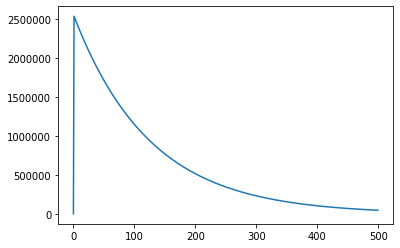

In [19]:
plt.plot(losses)
plt.show()

In [20]:
classes=len(np.unique(Y))
print(classes)

3


In [21]:
def classWiseData(x,y):
    data={}
    for i in range(classes):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [22]:
data=classWiseData(img_data,Y)

In [23]:
def getDataPairForSvm(d1,d2):
    l1,l2=d1.shape[0],d2.shape[0]
    features=d1.shape[1]
    sample=l1+l2
    data_pair=np.zeros((sample,features))
    labels=np.zeros((sample,))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    labels[:l1]=-1
    labels[l1:]=1
    return (data_pair,labels)

In [24]:
mysvm=SVM()

In [25]:
def trainSvm(x,y):
    svm_classifiers={}
    for i in range(classes):
        svm_classifiers[i]={}
        for j in range(i+1,classes):
            x_pair,y_pair=getDataPairForSvm(data[i],data[j])
            w,b,losses=mysvm.fit(x_pair,y_pair)
            svm_classifiers[i][j]=(w,b)
    return svm_classifiers       

In [26]:
svm_classifiers=trainSvm(img_data,Y)

In [27]:
print(type(svm_classifiers))

<class 'dict'>


In [28]:
def binary_prediction(x,w,b):
    z=np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [45]:
def predict(x):
    count=np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1,classes):
            w,b=svm_classifiers[i][j]
            z=binary_prediction(x,w,b)
            if z==-1:
                count[i]+=1
            else:
                count[j]+=1
    final_prediction=np.argmax(count)
    return label_dictionary[final_prediction]    

In [ ]:
prediction=predict(img_data[200])
print(prediction) # abe o itne hot log dekhe hain kbhi??
print(label_dictionary[Y[200]]) 

# Testing

In [ ]:
df_test=pd.read_csv("test.csv")
df_test=df_test.values
predictions=[]
test_data=[]

In [ ]:
for i in df_test:
    img_path ="../SVM/pokemon_test_data/images/"+i
    img_path=Path(*img_path)
    img=image.load_img(img_path,target_size=(100,100))
    img_array=image.img_to_array(img)
    img_array=img_array.reshape(1,-1)
    test_data.append(img_array)
    predictions.append(predict(img_array))

In [ ]:
print(len(predictions))

# Result

In [ ]:
df_test=df_test.reshape((df_test.shape[0],))
result=np.stack((df_test,predictions),axis=1)

In [ ]:
result_df=pd.DataFrame(result,columns=["ImageId","NameOfPokemons"])

In [ ]:
result_df.to_csv("result.csv",index=False)

# Testing for Ankit lol

In [40]:
img_path="../SVM/pikachu.jpg"
img=image.load_img(img_path,target_size=(100,100))
img_array=image.img_to_array(img)

In [41]:
img_array=img_array.reshape((1,-1))

(1, 30000)


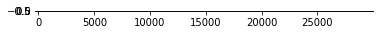

In [44]:
print(img_array.shape)
plt.imshow(img_array)
plt.show()

In [46]:
predict(img_array)

'Pikachu'

In [49]:
import cv2
img=cv2.imread('/SVM/pikachu.jpg')
#cv2.imshow("Image",img)

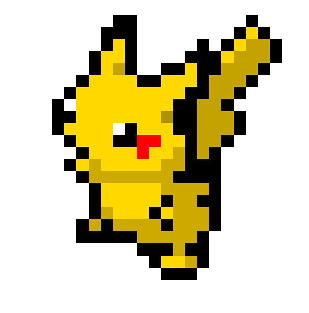

In [71]:
plt.style.use('seaborn')
img=plt.imread('pikachu.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()